# Open Avenues: Medical Labeling with Centaur Labs

Taking in initial packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

### Cleaning Data

Importing the data given:

In [2]:
results_df = pd.read_csv('1345_customer_results.csv',
                         usecols = ['Case ID','Origin', 'Labeling State', 'Qualified Reads', 'Correct Label', 
                                    'Majority Label', 'Difficulty', 'Agreement', 'First Choice Answer', 'First Choice Votes', 
                                    'First Choice Weight', 'Second Choice Answer', 'Second Choice Votes', 'Second Choice Weight'],
                         index_col = 'Case ID')

reads_df = pd.read_csv('1345_admin_reads.csv',
                       usecols = ['topic_id', 'problem_id', 'user_id', 'read_id', 'labeling_state', 
                                  'score', 'accuracy', 'contest_id', 'content_id','chosen_answer', 
                                  'origin', 'origin_created_at', 'answerChoiceIds', 'response_submitted_at', 'problem_appeared_at'])

Extracting the expert's yes votes:

In [3]:
valid_vote = results_df["Origin"].str.fullmatch(r'(.*)vote[0-8](.*)', case=False)
results_df = results_df.loc[valid_vote]
results_df['Expert Yes Votes'] = results_df['Origin'].astype(str).str[-5].astype(int)
results_df

,Origin,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Expert Yes Votes
Case ID,,,,,,,,,,,,,,
5888087,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B14_time139137_medoid_vote2.jpg,Gold Standard,2,'no','no',0.000,1.000,'no',2,1.54,'yes',0,0.00,2
5888088,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B10_time178433_medoid_vote0.jpg,Gold Standard,3,'no','no',0.000,1.000,'no',3,2.34,'yes',0,0.00,0
5888089,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B13_time175617_medoid_vote0.jpg,Gold Standard,2,'no','no',0.000,1.000,'no',2,1.70,'yes',0,0.00,0
5888090,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B19_time62657_medoid_vote0.jpg,Gold Standard,1,'no','no',0.000,1.000,'no',1,0.82,'yes',0,0.00,0
5888091,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B12_time28993_medoid_vote4.jpg,In Progress,7,NaN,'yes',NaN,0.571,'yes',4,3.28,'no',3,2.32,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5918375,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/S98_time69658_medoid_vote2.jpg,Gold Standard,2,'no','yes',1.000,1.000,'yes',2,1.56,'no',0,0.00,2
5918376,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/S93_time217256_member_vote3.jpg,Gold Standard,3,'no','yes',0.667,0.667,'yes',2,1.56,'no',1,0.76,3
5918377,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/S98_time55376_member_vote4.jpg,In Progress,6,NaN,'yes',NaN,1.000,'yes',6,4.78,'no',0,0.00,4


There is no longer a use for the 'Origin' column once we extracted the votes, so we can drop it now.

In [4]:
results_df = results_df.drop('Origin', axis = 1)

Here we label the expert's majority answers:
- If votes are greater than 4, we regard that as a yes.
- If votes are less than 4, we regard that as a no.
- If votes are exactly 4, we regarded that as undecided, and will fill those cells with a NaN.

In [5]:
results_df.loc[results_df['Expert Yes Votes'] > 4,'Expert Label'] = "'yes'"
results_df.loc[results_df['Expert Yes Votes'] < 4,'Expert Label'] = "'no'"
results_df.loc[results_df['Expert Yes Votes'] == 4,'Expert Label'] = "NaN"

In [6]:
results_df

,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Expert Yes Votes,Expert Label
Case ID,,,,,,,,,,,,,,
5888087,Gold Standard,2,'no','no',0.000,1.000,'no',2,1.54,'yes',0,0.00,2,'no'
5888088,Gold Standard,3,'no','no',0.000,1.000,'no',3,2.34,'yes',0,0.00,0,'no'
5888089,Gold Standard,2,'no','no',0.000,1.000,'no',2,1.70,'yes',0,0.00,0,'no'
5888090,Gold Standard,1,'no','no',0.000,1.000,'no',1,0.82,'yes',0,0.00,0,'no'
5888091,In Progress,7,NaN,'yes',NaN,0.571,'yes',4,3.28,'no',3,2.32,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5918375,Gold Standard,2,'no','yes',1.000,1.000,'yes',2,1.56,'no',0,0.00,2,'no'
5918376,Gold Standard,3,'no','yes',0.667,0.667,'yes',2,1.56,'no',1,0.76,3,'no'
5918377,In Progress,6,NaN,'yes',NaN,1.000,'yes',6,4.78,'no',0,0.00,4,NaN


## Objective: Show that the crowd agrees with the expert majority more than experts agreeing with the expert majority

Firstly, we find the proportion of agreements upon each 'yes' or 'no' answer. Expert agreement on expert vote gives the proportion of expert voters who agree with the majority expert label:

In [7]:
for i in range(9):
    if i < 4:
        results_df.loc[results_df['Expert Yes Votes'] == i,"Expert Agreement on Expert Vote"] = (8-i)/8
    if i == 4:
        results_df.loc[results_df['Expert Yes Votes'] == i,"Expert Agreement on Expert Vote"] = 'NaN'
    else:
        results_df.loc[results_df['Expert Yes Votes'] == i,"Expert Agreement on Expert Vote"] = i/8

Now we find the proportion of the crowd's agreement on the correct vote:

In [8]:
results_df["Crowd Agreement on Correct Vote"] = 1 - results_df['Difficulty']

In [9]:
results_df

,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Expert Yes Votes,Expert Label,Expert Agreement on Expert Vote,Crowd Agreement on Correct Vote
Case ID,,,,,,,,,,,,,,,,
5888087,Gold Standard,2,'no','no',0.000,1.000,'no',2,1.54,'yes',0,0.00,2,'no',0.25,1.000
5888088,Gold Standard,3,'no','no',0.000,1.000,'no',3,2.34,'yes',0,0.00,0,'no',0.0,1.000
5888089,Gold Standard,2,'no','no',0.000,1.000,'no',2,1.70,'yes',0,0.00,0,'no',0.0,1.000
5888090,Gold Standard,1,'no','no',0.000,1.000,'no',1,0.82,'yes',0,0.00,0,'no',0.0,1.000
5888091,In Progress,7,NaN,'yes',NaN,0.571,'yes',4,3.28,'no',3,2.32,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5918375,Gold Standard,2,'no','yes',1.000,1.000,'yes',2,1.56,'no',0,0.00,2,'no',0.25,0.000
5918376,Gold Standard,3,'no','yes',0.667,0.667,'yes',2,1.56,'no',1,0.76,3,'no',0.375,0.333
5918377,In Progress,6,NaN,'yes',NaN,1.000,'yes',6,4.78,'no',0,0.00,4,NaN,NaN,NaN


Getting rid of when there are empty cells in the crowd's agreement on correct vote:

In [10]:
results_df_with_agreements = results_df.dropna(axis = 0, subset = 'Crowd Agreement on Correct Vote')
len(results_df_with_agreements)

23758

### Histogram displaying how often crowd agrees with the correct vote:

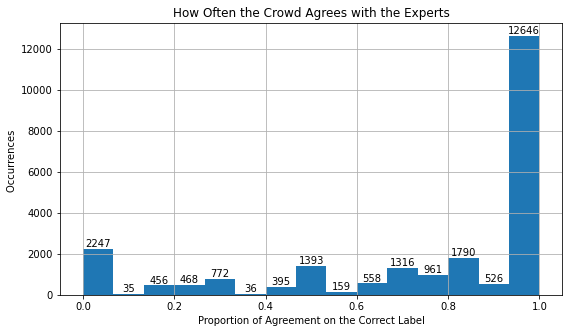

In [11]:
plt.figure(figsize = (9,5))
counts, edges, bars = plt.hist(results_df_with_agreements['Crowd Agreement on Correct Vote'], bins = 15)
plt.bar_label(bars)
plt.xlabel("Proportion of Agreement on the Correct Label")
plt.ylabel("Occurrences ")
plt.title("How Often the Crowd Agrees with the Experts")
plt.grid()
plt.show()

- From the graph we can see that a majority of the time, the crowd agrees with the correct votes.
- 53.22% of the time, the crowd agreed unanimously with the correct label.

### Let's now consider when experts have a low agreement.

What is the agreement of the crowd in this situation?

We start by gathering the results where experts almost had a split decision.
- This is either when an image labelled yes had 5 yes votes out of 8 votes,
- or when an image labelled no had 5 no votes out of 8 votes.

In [12]:
low_expert_agreement = results_df_with_agreements[results_df_with_agreements["Expert Yes Votes"].isin([3,5])]
len(low_expert_agreement)

5934

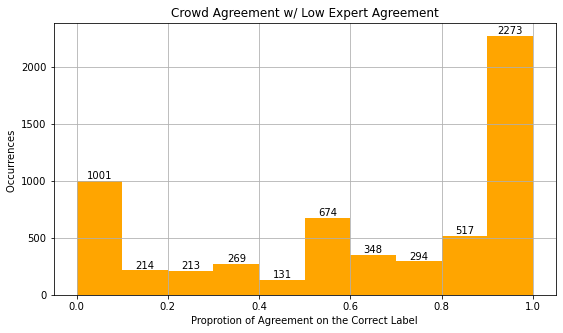

In [13]:
plt.figure(figsize = (9,5))
counts, edges, bars = plt.hist(low_expert_agreement['Crowd Agreement on Correct Vote'], color = 'orange')
plt.bar_label(bars)
plt.xlabel('Proprotion of Agreement on the Correct Label')
plt.ylabel('Occurrences ')
plt.title('Crowd Agreement w/ Low Expert Agreement')
plt.grid()
plt.show()

- Now we see that out of 5,934 images where the answers between experts were not that unanimous, only 2,273 of the crowd was able to make a unanimous decision on the same images
- That's 38.3%. Much smaller than when we considered all the votes.
- This inference should lead us to see what the crowd does when the experts come to a unanimous decision.

### Let's also consider when they have a unanimous agreement. How does the crowd's agreement look?

In a similar fashion to the low expert agreements, we will gather the data where all the experts agreed yes on an image or all agreed no on an image:

In [14]:
high_expert_agreement = results_df_with_agreements[results_df_with_agreements["Expert Yes Votes"].isin([0,8])]
len(high_expert_agreement)

5949

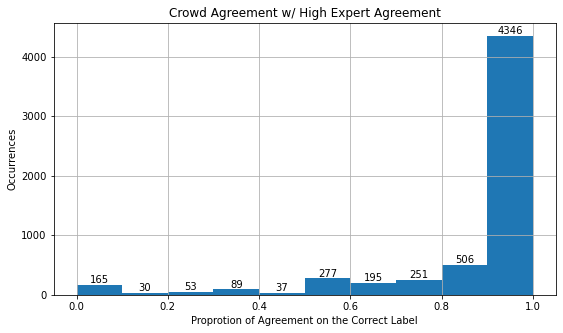

In [15]:
plt.figure(figsize = (9,5))
counts, edges, bars = plt.hist(high_expert_agreement['Crowd Agreement on Correct Vote'])
plt.bar_label(bars)
plt.xlabel('Proprotion of Agreement on the Correct Label')
plt.ylabel('Occurrences')
plt.title('Crowd Agreement w/ High Expert Agreement')
plt.grid()
plt.show()

- We can see the staggering difference in agreement from this graph.
- From the 5,949 images where experts had unanimous agreement, 73% of the crowd was also able to unanimously agree.

### Now let's compare these two graphs together:

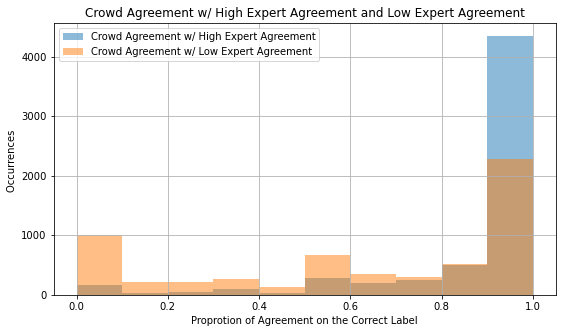

In [16]:
plt.figure(figsize = (9,5))
plt.hist(high_expert_agreement['Crowd Agreement on Correct Vote'], alpha=0.5, label='Crowd Agreement w/ High Expert Agreement')
plt.hist(low_expert_agreement['Crowd Agreement on Correct Vote'], alpha=0.5, label='Crowd Agreement w/ Low Expert Agreement')
plt.legend(loc='upper left')
plt.title('Crowd Agreement w/ High Expert Agreement and Low Expert Agreement')
plt.xlabel('Proprotion of Agreement on the Correct Label')
plt.ylabel('Occurrences ')
plt.grid()
plt.show()

- Where there is high expert agreement (all 8 experts voting yes / all 8 expert voting no), the majority has a high unanimous agreement rate on the correct label too.
- When experts have a low agreement amongst one another, the crowd reflects this as well. The crowds answers are much more spread out when the experts also cannot come to a unanimous decision.

# Implied Error Rates

Here we will calculate the implied error rates of the experts.
- If the majority vote is no, their implied error rate is equal to the number of expert yes votes divided by 8.
- If the majority vote is yes, their implied error rate is equal to one minus the number of expert yes votes divided by 8.

In [17]:
results_df['Expert\'s Implied Error Rate'] = np.where((results_df['Expert Yes Votes'] > 4), (1 -(results_df['Expert Yes Votes']/8)), (results_df['Expert Yes Votes']/8))
results_df['Expert\'s Implied Error Rate'] = results_df['Expert\'s Implied Error Rate'].replace(to_replace=0.5, value='NaN')

In [18]:
results_df

,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Expert Yes Votes,Expert Label,Expert Agreement on Expert Vote,Crowd Agreement on Correct Vote,Expert's Implied Error Rate
Case ID,,,,,,,,,,,,,,,,,
5888087,Gold Standard,2,'no','no',0.000,1.000,'no',2,1.54,'yes',0,0.00,2,'no',0.25,1.000,0.25
5888088,Gold Standard,3,'no','no',0.000,1.000,'no',3,2.34,'yes',0,0.00,0,'no',0.0,1.000,0.0
5888089,Gold Standard,2,'no','no',0.000,1.000,'no',2,1.70,'yes',0,0.00,0,'no',0.0,1.000,0.0
5888090,Gold Standard,1,'no','no',0.000,1.000,'no',1,0.82,'yes',0,0.00,0,'no',0.0,1.000,0.0
5888091,In Progress,7,NaN,'yes',NaN,0.571,'yes',4,3.28,'no',3,2.32,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5918375,Gold Standard,2,'no','yes',1.000,1.000,'yes',2,1.56,'no',0,0.00,2,'no',0.25,0.000,0.25
5918376,Gold Standard,3,'no','yes',0.667,0.667,'yes',2,1.56,'no',1,0.76,3,'no',0.375,0.333,0.375
5918377,In Progress,6,NaN,'yes',NaN,1.000,'yes',6,4.78,'no',0,0.00,4,NaN,NaN,NaN,NaN


In [20]:
results_df['Expert\'s Implied Error Rate'].value_counts()

0.25     6000
0.0      6000
0.125    6000
0.375    6000
NaN      3000
Name: Expert's Implied Error Rate, dtype: int64

- Rates marked NaN are for when there is a split decision.
- An implied error rate = 0 represents when experts had a unanimous decision.
- The larger the implied error rate, the more the experts disagreed on an image.

# Let's consider the case where expert's cannot agree. How do crowd votes look?

Let's look at the crowd agreement when the experts do not agree on a yes vote or no vote:
- Recall: "Agreement: Qualified Reads with the Majority Label divided by total Qualified Reads"

In [21]:
no_expert_agreement = results_df[results_df['Expert Yes Votes'] == 4]

In [22]:
no_expert_agreement

,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Expert Yes Votes,Expert Label,Expert Agreement on Expert Vote,Crowd Agreement on Correct Vote,Expert's Implied Error Rate
Case ID,,,,,,,,,,,,,,,,,
5888091,In Progress,7,NaN,'yes',NaN,0.571,'yes',4,3.28,'no',3,2.32,4,NaN,NaN,NaN,NaN
5888782,In Progress,5,NaN,'no',NaN,1.000,'no',5,3.94,'yes',0,0.00,4,NaN,NaN,NaN,NaN
5891822,In Progress,5,NaN,'yes',NaN,0.800,'yes',4,3.10,'no',1,0.76,4,NaN,NaN,NaN,NaN
5891960,In Progress,7,NaN,'no',NaN,1.000,'no',7,5.53,'yes',0,0.00,4,NaN,NaN,NaN,NaN
5891979,In Progress,8,NaN,'no',NaN,0.625,'no',5,3.92,'yes',3,2.38,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5918358,In Progress,13,NaN,'yes',NaN,0.769,'yes',10,7.84,'no',3,2.36,4,NaN,NaN,NaN,NaN
5918360,In Progress,5,NaN,'yes',NaN,1.000,'yes',5,3.92,'no',0,0.00,4,NaN,NaN,NaN,NaN
5918363,In Progress,8,NaN,'yes',NaN,1.000,'yes',8,6.26,'no',0,0.00,4,NaN,NaN,NaN,NaN


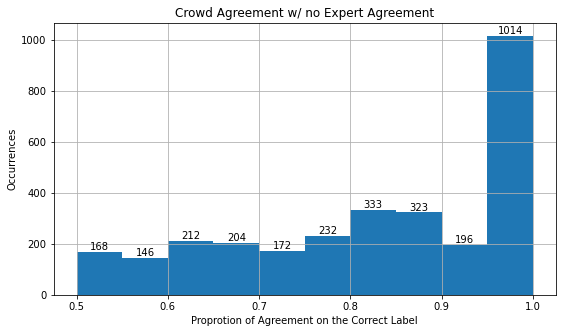

In [23]:
plt.figure(figsize = (9,5))
counts, edges, bars = plt.hist(no_expert_agreement['Agreement'])
plt.bar_label(bars)
plt.xlabel('Proprotion of Agreement on the Correct Label')
plt.ylabel('Occurrences')
plt.title('Crowd Agreement w/ no Expert Agreement')
plt.grid()
plt.show()

- From the 3,000 images where expert's could not come to an agreement, the crowd came to an agreement of 90% or greater 40.3% of the time.
- And from our past inferences, we saw high rates of agreement between the crowd and experts. 
- Some questions this information leads to is:
   - If we had more expert votes, would they be able to come to an agreement on these cases?
   - Since we saw the crowd agrees with the experts, can we trust the crowd majority in these cases?